In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d
import matplotlib.tri as tri

In [2]:
df = pd.read_csv('Postures.csv')
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?


In [3]:
df.tail()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
78091,5,14,54.251127,129.177414,-44.252511,27.720784,107.810661,11.099282,-1.270139,122.758679,...,-6.54311453354464,87.7333643096221,61.2163626180662,-62.1262783028233,?,?,?,?,?,?
78092,5,14,54.334883,129.253842,-44.016320,27.767911,107.914808,11.069842,-30.334054,77.858214,...,-62.1305625712145,78.2298473919132,33.0784071753174,-45.2495433686171,?,?,?,?,?,?
78093,5,14,54.151540,129.269502,-44.173273,27.725978,108.034006,11.020347,-22.574718,104.222208,...,3.83590370588782,78.591554010542,32.32773753847,-46.1665560916632,?,?,?,?,?,?
78094,5,14,27.915311,108.007390,10.814957,-0.910435,122.464093,-47.271248,-30.084588,77.705861,...,-63.2216259324485,?,?,?,?,?,?,?,?,?
78095,5,14,27.898705,108.092877,11.107857,-30.031402,77.740235,-17.453099,-1.091566,122.827638,...,-63.0265744155222,78.8796525666014,31.6030997578398,-47.0137357205196,?,?,?,?,?,?


In [4]:
df.shape

(78096, 38)

In [5]:
df.size

2967648

In [6]:
df.columns

Index(['Class', 'User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2',
       'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6',
       'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10',
       'Z10', 'X11', 'Y11', 'Z11'],
      dtype='object')

In [7]:
df['User'].nunique()

14

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
Class    78096 non-null int64
User     78096 non-null int64
X0       78096 non-null float64
Y0       78096 non-null float64
Z0       78096 non-null float64
X1       78096 non-null float64
Y1       78096 non-null float64
Z1       78096 non-null float64
X2       78096 non-null float64
Y2       78096 non-null float64
Z2       78096 non-null float64
X3       78096 non-null object
Y3       78096 non-null object
Z3       78096 non-null object
X4       78096 non-null object
Y4       78096 non-null object
Z4       78096 non-null object
X5       78096 non-null object
Y5       78096 non-null object
Z5       78096 non-null object
X6       78096 non-null object
Y6       78096 non-null object
Z6       78096 non-null object
X7       78096 non-null object
Y7       78096 non-null object
Z7       78096 non-null object
X8       78096 non-null object
Y8       78096 non-null object
Z8       78096 n

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,78096.0,2.983738,1.421183,0.000000,2.000000,3.000000,4.000000,5.000000
User,78096.0,7.959127,4.697810,0.000000,5.000000,9.000000,12.000000,14.000000
X0,78096.0,50.345664,32.696173,-108.552738,29.295062,54.619964,72.488686,190.017835
Y0,78096.0,85.812051,40.204363,-98.233756,63.494432,86.526246,113.107355,169.175464
Z0,78096.0,-29.984712,34.361918,-126.770872,-56.356438,-30.864125,-1.418803,113.345119
X1,78096.0,49.595209,32.478238,-111.685241,28.755137,54.215514,71.762039,188.691997
Y1,78096.0,86.192647,40.453214,-96.142589,64.154529,87.542751,116.219398,170.209350
Z1,78096.0,-29.509202,34.764398,-166.006838,-57.360107,-30.184005,-0.366692,104.697852
X2,78096.0,48.612121,33.605390,-106.886524,25.170006,53.814580,71.561951,188.760168
Y2,78096.0,83.771315,41.023543,-100.789312,58.052385,86.458324,106.660827,168.186466


#### Replacing '?' sign with null values

In [10]:
df.replace({'?':np.nan},inplace=True)

In [11]:
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df = df.astype('float')

#### Calculating null values

In [13]:
df.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         690
Y3         690
Z3         690
X4        3120
Y4        3120
Z4        3120
X5       13023
Y5       13023
Z5       13023
X6       25848
Y6       25848
Z6       25848
X7       39152
Y7       39152
Z7       39152
X8       47532
Y8       47532
Z8       47532
X9       54128
Y9       54128
Z9       54128
X10      63343
Y10      63343
Z10      63343
X11      78064
Y11      78064
Z11      78064
dtype: int64

In [14]:
df.isnull().sum()/df['X0'].count()

Class    0.000000
User     0.000000
X0       0.000000
Y0       0.000000
Z0       0.000000
X1       0.000000
Y1       0.000000
Z1       0.000000
X2       0.000000
Y2       0.000000
Z2       0.000000
X3       0.008835
Y3       0.008835
Z3       0.008835
X4       0.039951
Y4       0.039951
Z4       0.039951
X5       0.166756
Y5       0.166756
Z5       0.166756
X6       0.330977
Y6       0.330977
Z6       0.330977
X7       0.501332
Y7       0.501332
Z7       0.501332
X8       0.608636
Y8       0.608636
Z8       0.608636
X9       0.693096
Y9       0.693096
Z9       0.693096
X10      0.811091
Y10      0.811091
Z10      0.811091
X11      0.999590
Y11      0.999590
Z11      0.999590
dtype: float64

In [15]:
class1 = df[df['Class']==1]
class1.shape

(16265, 38)

In [16]:
class1.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         661
Y3         661
Z3         661
X4        2075
Y4        2075
Z4        2075
X5        7074
Y5        7074
Z5        7074
X6       13626
Y6       13626
Z6       13626
X7       16213
Y7       16213
Z7       16213
X8       16217
Y8       16217
Z8       16217
X9       16217
Y9       16217
Z9       16217
X10      16217
Y10      16217
Z10      16217
X11      16265
Y11      16265
Z11      16265
dtype: int64

In [17]:
class2 = df[df['Class']==2]
class2.shape

(14978, 38)

In [18]:
class2.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3           0
Y3           0
Z3           0
X4          28
Y4          28
Z4          28
X5          69
Y5          69
Z5          69
X6         217
Y6         217
Z6         217
X7         310
Y7         310
Z7         310
X8         428
Y8         428
Z8         428
X9        1454
Y9        1454
Z9        1454
X10       4454
Y10       4454
Z10       4454
X11      14947
Y11      14947
Z11      14947
dtype: int64

In [19]:
class3 = df[df['Class']==3]
class3.shape

(16344, 38)

In [20]:
class3.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3          22
Y3          22
Z3          22
X4         964
Y4         964
Z4         964
X5        5598
Y5        5598
Z5        5598
X6        9921
Y6        9921
Z6        9921
X7       12788
Y7       12788
Z7       12788
X8       16263
Y8       16263
Z8       16263
X9       16344
Y9       16344
Z9       16344
X10      16344
Y10      16344
Z10      16344
X11      16344
Y11      16344
Z11      16344
dtype: int64

In [21]:
class4 = df[df['Class']==4]
class4.shape

(14775, 38)

In [22]:
class4.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3           1
Y3           1
Z3           1
X4           6
Y4           6
Z4           6
X5         197
Y5         197
Z5         197
X6        1757
Y6        1757
Z6        1757
X7        9008
Y7        9008
Z7        9008
X8       12426
Y8       12426
Z8       12426
X9       14762
Y9       14762
Z9       14762
X10      14775
Y10      14775
Z10      14775
X11      14775
Y11      14775
Z11      14775
dtype: int64

In [23]:
class5 = df[df['Class']==5]
class5.shape

(15733, 38)

In [24]:
class5.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3           6
Y3           6
Z3           6
X4          47
Y4          47
Z4          47
X5          85
Y5          85
Z5          85
X6         327
Y6         327
Z6         327
X7         833
Y7         833
Z7         833
X8        2198
Y8        2198
Z8        2198
X9        5351
Y9        5351
Z9        5351
X10      11553
Y10      11553
Z10      11553
X11      15733
Y11      15733
Z11      15733
dtype: int64

#### Dealing with null values

Replacing null values with '0'

In [25]:
df.fillna(0,inplace=True)

In [26]:
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
class1['X3'].fillna(np.mean(class1['X3']),inplace=True)

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [28]:
class1['Y3'].fillna(np.mean(class1['Y3']),inplace=True)

In [29]:
class1['Z3'].fillna(np.mean(class1['Z3']),inplace=True)

In [30]:
class1['X4'].fillna(np.mean(class1['X4']),inplace=True)

In [31]:
class1['Y4'].fillna(np.mean(class1['Y4']),inplace=True)

In [32]:
class1['Z4'].fillna(np.mean(class1['Z4']),inplace=True)

In [33]:
class1['X5'].fillna(np.mean(class1['X5']),inplace=True)

In [34]:
class1['Y5'].fillna(np.mean(class1['Y5']),inplace=True)

In [35]:
class1['Z5'].fillna(np.mean(class1['Z5']),inplace=True)

In [36]:
class1['X6'].fillna(np.mean(class1['X6']),inplace=True)

In [37]:
class1['Y6'].fillna(np.mean(class1['Y6']),inplace=True)

In [38]:
class1['Z6'].fillna(np.mean(class1['Z6']),inplace=True)

In [39]:
class1['X7'].fillna(np.mean(class1['X7']),inplace=True)

In [40]:
class1['Y7'].fillna(np.mean(class1['Y7']),inplace=True)

In [41]:
class1['Z7'].fillna(np.mean(class1['Z7']),inplace=True)

In [42]:
class1['X8'].fillna(np.mean(class1['X8']),inplace=True)

In [43]:
class1['Y8'].fillna(np.mean(class1['Y8']),inplace=True)

In [44]:
class1['Z8'].fillna(np.mean(class1['Z8']),inplace=True)

In [45]:
class1['X9'].fillna(np.mean(class1['X9']),inplace=True)

In [46]:
class1['Y9'].fillna(np.mean(class1['Y9']),inplace=True)

In [47]:
class1['Z9'].fillna(np.mean(class1['Z9']),inplace=True)

In [48]:
class1['X10'].fillna(np.mean(class1['X10']),inplace=True)

In [49]:
class1['Y10'].fillna(np.mean(class1['Y10']),inplace=True)

In [50]:
class1['Z10'].fillna(np.mean(class1['Z10']),inplace=True)

In [51]:
class1['X11'].fillna(np.mean(class1['X11']),inplace=True)

In [52]:
class1['Y11'].fillna(np.mean(class1['Y11']),inplace=True)

In [53]:
class1['Z11'].fillna(np.mean(class1['Z11']),inplace=True)

In [54]:
class2['X4'].fillna(np.mean(class2['X4']),inplace=True)

In [55]:
class2['Y4'].fillna(np.mean(class2['Y4']),inplace=True)

In [56]:
class2['Z4'].fillna(np.mean(class2['Z4']),inplace=True)

In [57]:
class2['X5'].fillna(np.mean(class2['X5']),inplace=True)

In [58]:
class2['Y5'].fillna(np.mean(class2['Y5']),inplace=True)

In [59]:
class2['Z5'].fillna(np.mean(class2['Z5']),inplace=True)

In [60]:
class2['X6'].fillna(np.mean(class2['X6']),inplace=True)

In [61]:
class2['Y6'].fillna(np.mean(class2['Y6']),inplace=True)

In [62]:
class2['Z6'].fillna(np.mean(class2['Z6']),inplace=True)

In [63]:
class2['X7'].fillna(np.mean(class2['X7']),inplace=True)

In [64]:
class2['Y7'].fillna(np.mean(class2['Y7']),inplace=True)

In [65]:
class2['Z7'].fillna(np.mean(class2['Z7']),inplace=True)

In [66]:
class2['X8'].fillna(np.mean(class2['X8']),inplace=True)

In [67]:
class2['Y8'].fillna(np.mean(class2['Y8']),inplace=True)

In [68]:
class2['Z8'].fillna(np.mean(class2['Z8']),inplace=True)

In [69]:
class2['X9'].fillna(np.mean(class2['X9']),inplace=True)

In [70]:
class2['Y9'].fillna(np.mean(class2['Y9']),inplace=True)

In [71]:
class2['Z9'].fillna(np.mean(class2['Z9']),inplace=True)

In [72]:
class2['X10'].fillna(np.mean(class2['X10']),inplace=True)

In [73]:
class2['Y10'].fillna(np.mean(class2['Y10']),inplace=True)

In [74]:
class2['Z10'].fillna(np.mean(class2['Z10']),inplace=True)

In [75]:
class2['X11'].fillna(np.mean(class2['X11']),inplace=True)

In [76]:
class2['Y11'].fillna(np.mean(class2['Y11']),inplace=True)

In [77]:
class2['Z11'].fillna(np.mean(class2['Z11']),inplace=True)

In [78]:
class3['X3'].fillna(np.mean(class3['X3']),inplace=True)

In [79]:
class3['Y3'].fillna(np.mean(class3['Y3']),inplace=True)

In [80]:
class3['Z3'].fillna(np.mean(class3['Z3']),inplace=True)

In [81]:
class3['X4'].fillna(np.mean(class3['X4']),inplace=True)

In [82]:
class3['Y4'].fillna(np.mean(class3['Y4']),inplace=True)

In [83]:
class3['Z4'].fillna(np.mean(class3['Z4']),inplace=True)

In [84]:
class3['X5'].fillna(np.mean(class3['X5']),inplace=True)

In [85]:
class3['Y5'].fillna(np.mean(class3['Y5']),inplace=True)

In [86]:
class3['Z5'].fillna(np.mean(class3['Z5']),inplace=True)

In [87]:
class3['X6'].fillna(np.mean(class3['X6']),inplace=True)

In [88]:
class3['Y6'].fillna(np.mean(class3['Y6']),inplace=True)

In [89]:
class3['Z6'].fillna(np.mean(class3['Z6']),inplace=True)

In [90]:
class3['X7'].fillna(np.mean(class3['X7']),inplace=True)

In [91]:
class3['Y7'].fillna(np.mean(class3['Y7']),inplace=True)

In [92]:
class3['Z7'].fillna(np.mean(class3['Z7']),inplace=True)

In [93]:
class3['X8'].fillna(np.mean(class3['X8']),inplace=True)

In [94]:
class3['Y8'].fillna(np.mean(class3['Y8']),inplace=True)

In [95]:
class3['Z8'].fillna(np.mean(class3['Z8']),inplace=True)

In [96]:
class3['X9'].fillna(np.mean(class3['X9']),inplace=True)

In [97]:
class3['Y9'].fillna(np.mean(class3['Y9']),inplace=True)

In [98]:
class3['Z9'].fillna(np.mean(class3['Z9']),inplace=True)

In [99]:
class3['X10'].fillna(np.mean(class3['X10']),inplace=True)

In [100]:
class3['Y10'].fillna(np.mean(class3['Y10']),inplace=True)

In [101]:
class3['Z10'].fillna(np.mean(class3['Z10']),inplace=True)

In [102]:
class3['X11'].fillna(np.mean(class3['X11']),inplace=True)

In [103]:
class3['Y11'].fillna(np.mean(class3['Y11']),inplace=True)

In [104]:
class3['Z11'].fillna(np.mean(class3['Z11']),inplace=True)

In [105]:
class4['X3'].fillna(np.mean(class4['X3']),inplace=True)

In [106]:
class4['Y3'].fillna(np.mean(class4['Y3']),inplace=True)

In [107]:
class4['Z3'].fillna(np.mean(class4['Z3']),inplace=True)

In [108]:
class4['X4'].fillna(np.mean(class4['X4']),inplace=True)

In [109]:
class4['Y4'].fillna(np.mean(class4['Y4']),inplace=True)

In [110]:
class4['Z4'].fillna(np.mean(class4['Z4']),inplace=True)

In [111]:
class4['X5'].fillna(np.mean(class4['X5']),inplace=True)

In [112]:
class4['Y5'].fillna(np.mean(class4['Y5']),inplace=True)

In [113]:
class4['Z5'].fillna(np.mean(class4['Z5']),inplace=True)

In [114]:
class4['X6'].fillna(np.mean(class4['X6']),inplace=True)

In [115]:
class4['Y6'].fillna(np.mean(class4['Y6']),inplace=True)

In [116]:
class4['Z6'].fillna(np.mean(class4['Z6']),inplace=True)

In [117]:
class4['X7'].fillna(np.mean(class4['X7']),inplace=True)

In [118]:
class4['Y7'].fillna(np.mean(class4['Y7']),inplace=True)

In [119]:
class4['Z7'].fillna(np.mean(class4['Z7']),inplace=True)

In [120]:
class4['X8'].fillna(np.mean(class4['X8']),inplace=True)

In [121]:
class4['Y8'].fillna(np.mean(class4['Y8']),inplace=True)

In [122]:
class4['Z8'].fillna(np.mean(class4['Z8']),inplace=True)

In [123]:
class4['X9'].fillna(np.mean(class4['X9']),inplace=True)

In [124]:
class4['Y9'].fillna(np.mean(class4['Y9']),inplace=True)

In [125]:
class4['Z9'].fillna(np.mean(class4['Z9']),inplace=True)

In [126]:
class4['X10'].fillna(np.mean(class4['X10']),inplace=True)

In [127]:
class4['Y10'].fillna(np.mean(class4['Y10']),inplace=True)

In [128]:
class4['Z10'].fillna(np.mean(class4['Z10']),inplace=True)

In [129]:
class4['X11'].fillna(np.mean(class4['X11']),inplace=True)

In [130]:
class4['Y11'].fillna(np.mean(class4['Y11']),inplace=True)

In [131]:
class4['Z11'].fillna(np.mean(class4['Z11']),inplace=True)

In [132]:
class5['X3'].fillna(np.mean(class5['X3']),inplace=True)

In [133]:
class5['Y3'].fillna(np.mean(class5['Y3']),inplace=True)

In [134]:
class5['Z3'].fillna(np.mean(class5['Z3']),inplace=True)

In [135]:
class5['X4'].fillna(np.mean(class5['X4']),inplace=True)

In [136]:
class5['Y4'].fillna(np.mean(class5['Y4']),inplace=True)

In [137]:
class5['Z4'].fillna(np.mean(class5['Z4']),inplace=True)

In [138]:
class5['X5'].fillna(np.mean(class5['X5']),inplace=True)

In [139]:
class5['Y5'].fillna(np.mean(class5['Y5']),inplace=True)

In [140]:
class5['Z5'].fillna(np.mean(class5['Z5']),inplace=True)

In [141]:
class5['X6'].fillna(np.mean(class5['X6']),inplace=True)

In [142]:
class5['Y6'].fillna(np.mean(class5['Y6']),inplace=True)

In [143]:
class5['Z6'].fillna(np.mean(class5['Z6']),inplace=True)

In [144]:
class5['X7'].fillna(np.mean(class5['X7']),inplace=True)

In [145]:
class5['Y7'].fillna(np.mean(class5['Y7']),inplace=True)

In [146]:
class5['Z7'].fillna(np.mean(class5['Z7']),inplace=True)

In [147]:
class5['X8'].fillna(np.mean(class5['X8']),inplace=True)

In [148]:
class5['Y8'].fillna(np.mean(class5['Y8']),inplace=True)

In [149]:
class5['Z8'].fillna(np.mean(class5['Z8']),inplace=True)

In [150]:
class5['X9'].fillna(np.mean(class5['X9']),inplace=True)

In [151]:
class5['Y9'].fillna(np.mean(class5['Y9']),inplace=True)

In [152]:
class5['Z9'].fillna(np.mean(class5['Z9']),inplace=True)

In [153]:
class5['X10'].fillna(np.mean(class5['X10']),inplace=True)

In [154]:
class5['Y10'].fillna(np.mean(class5['Y10']),inplace=True)

In [155]:
class5['Z10'].fillna(np.mean(class5['Z10']),inplace=True)

In [156]:
class5['X11'].fillna(np.mean(class5['X11']),inplace=True)

In [157]:
class5['Y11'].fillna(np.mean(class5['Y11']),inplace=True)

In [158]:
class5['Z11'].fillna(np.mean(class5['Z11']),inplace=True)

In [159]:
class1.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3           0
Y3           0
Z3           0
X4           0
Y4           0
Z4           0
X5           0
Y5           0
Z5           0
X6           0
Y6           0
Z6           0
X7           0
Y7           0
Z7           0
X8           0
Y8           0
Z8           0
X9           0
Y9           0
Z9           0
X10          0
Y10          0
Z10          0
X11      16265
Y11      16265
Z11      16265
dtype: int64

In [160]:
class2.isnull().sum()

Class    0
User     0
X0       0
Y0       0
Z0       0
X1       0
Y1       0
Z1       0
X2       0
Y2       0
Z2       0
X3       0
Y3       0
Z3       0
X4       0
Y4       0
Z4       0
X5       0
Y5       0
Z5       0
X6       0
Y6       0
Z6       0
X7       0
Y7       0
Z7       0
X8       0
Y8       0
Z8       0
X9       0
Y9       0
Z9       0
X10      0
Y10      0
Z10      0
X11      0
Y11      0
Z11      0
dtype: int64

In [161]:
class3.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3           0
Y3           0
Z3           0
X4           0
Y4           0
Z4           0
X5           0
Y5           0
Z5           0
X6           0
Y6           0
Z6           0
X7           0
Y7           0
Z7           0
X8           0
Y8           0
Z8           0
X9       16344
Y9       16344
Z9       16344
X10      16344
Y10      16344
Z10      16344
X11      16344
Y11      16344
Z11      16344
dtype: int64

In [162]:
class4.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3           0
Y3           0
Z3           0
X4           0
Y4           0
Z4           0
X5           0
Y5           0
Z5           0
X6           0
Y6           0
Z6           0
X7           0
Y7           0
Z7           0
X8           0
Y8           0
Z8           0
X9           0
Y9           0
Z9           0
X10      14775
Y10      14775
Z10      14775
X11      14775
Y11      14775
Z11      14775
dtype: int64

In [163]:
class5.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3           0
Y3           0
Z3           0
X4           0
Y4           0
Z4           0
X5           0
Y5           0
Z5           0
X6           0
Y6           0
Z6           0
X7           0
Y7           0
Z7           0
X8           0
Y8           0
Z8           0
X9           0
Y9           0
Z9           0
X10          0
Y10          0
Z10          0
X11      15733
Y11      15733
Z11      15733
dtype: int64

In [164]:
df1 = pd.concat([class1,class2,class3,class4,class5])
df1.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
1,1.0,0.0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,-1.07738,37.172842,87.562493,-10.66372,54.057026,76.311915,-27.775952,NaN,NaN,NaN
2,1.0,0.0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,-1.07738,37.172842,87.562493,-10.66372,54.057026,76.311915,-27.775952,NaN,NaN,NaN
3,1.0,0.0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,-1.07738,37.172842,87.562493,-10.66372,54.057026,76.311915,-27.775952,NaN,NaN,NaN
4,1.0,0.0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,-1.07738,37.172842,87.562493,-10.66372,54.057026,76.311915,-27.775952,NaN,NaN,NaN
5,1.0,0.0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,-1.07738,37.172842,87.562493,-10.66372,54.057026,76.311915,-27.775952,NaN,NaN,NaN


In [165]:
df1.isnull().sum()

Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3           0
Y3           0
Z3           0
X4           0
Y4           0
Z4           0
X5           0
Y5           0
Z5           0
X6           0
Y6           0
Z6           0
X7           0
Y7           0
Z7           0
X8           0
Y8           0
Z8           0
X9       16344
Y9       16344
Z9       16344
X10      31119
Y10      31119
Z10      31119
X11      63117
Y11      63117
Z11      63117
dtype: int64

In [166]:
df1.drop(['X9','Y9','Z9','X10','Y10','Z10','X11','Y11','Z11'],axis=1,inplace=True)

In [167]:
df1.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z5,X6,Y6,Z6,X7,Y7,Z7,X8,Y8,Z8
1,1.0,0.0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,-52.682184,36.125151,52.537321,-56.444042,25.448563,97.622121,1.356154,33.041242,100.140647,-1.07738
2,1.0,0.0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,-52.682184,36.125151,52.537321,-56.444042,25.448563,97.622121,1.356154,33.041242,100.140647,-1.07738
3,1.0,0.0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,-52.682184,36.125151,52.537321,-56.444042,25.448563,97.622121,1.356154,33.041242,100.140647,-1.07738
4,1.0,0.0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,-52.682184,36.125151,52.537321,-56.444042,25.448563,97.622121,1.356154,33.041242,100.140647,-1.07738
5,1.0,0.0,55.142401,71.435607,-64.177303,36.175818,81.556874,-53.475747,76.986143,42.426849,...,-52.682184,36.125151,52.537321,-56.444042,25.448563,97.622121,1.356154,33.041242,100.140647,-1.07738


In [168]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78095 entries, 1 to 78095
Data columns (total 29 columns):
Class    78095 non-null float64
User     78095 non-null float64
X0       78095 non-null float64
Y0       78095 non-null float64
Z0       78095 non-null float64
X1       78095 non-null float64
Y1       78095 non-null float64
Z1       78095 non-null float64
X2       78095 non-null float64
Y2       78095 non-null float64
Z2       78095 non-null float64
X3       78095 non-null float64
Y3       78095 non-null float64
Z3       78095 non-null float64
X4       78095 non-null float64
Y4       78095 non-null float64
Z4       78095 non-null float64
X5       78095 non-null float64
Y5       78095 non-null float64
Z5       78095 non-null float64
X6       78095 non-null float64
Y6       78095 non-null float64
Z6       78095 non-null float64
X7       78095 non-null float64
Y7       78095 non-null float64
Z7       78095 non-null float64
X8       78095 non-null float64
Y8       78095 non-null flo

In [169]:
df1['Class']=df['Class'].astype('object')
df1['User']=df['User'].astype('object')

In [170]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78095 entries, 1 to 78095
Data columns (total 29 columns):
Class    78095 non-null object
User     78095 non-null object
X0       78095 non-null float64
Y0       78095 non-null float64
Z0       78095 non-null float64
X1       78095 non-null float64
Y1       78095 non-null float64
Z1       78095 non-null float64
X2       78095 non-null float64
Y2       78095 non-null float64
Z2       78095 non-null float64
X3       78095 non-null float64
Y3       78095 non-null float64
Z3       78095 non-null float64
X4       78095 non-null float64
Y4       78095 non-null float64
Z4       78095 non-null float64
X5       78095 non-null float64
Y5       78095 non-null float64
Z5       78095 non-null float64
X6       78095 non-null float64
Y6       78095 non-null float64
Z6       78095 non-null float64
X7       78095 non-null float64
Y7       78095 non-null float64
Z7       78095 non-null float64
X8       78095 non-null float64
Y8       78095 non-null float

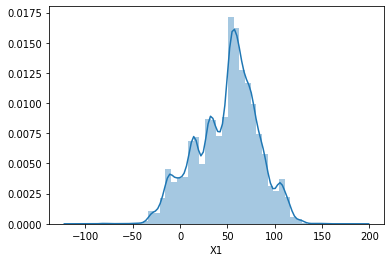

In [170]:
sns.distplot(df1['X1'])
plt.show()

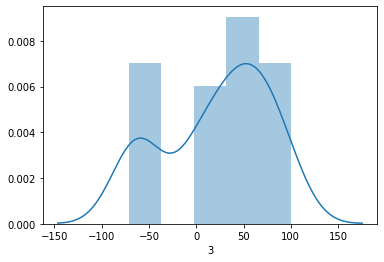

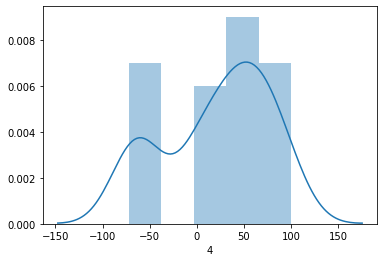

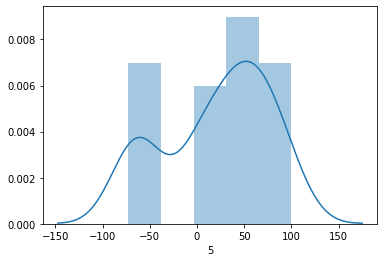

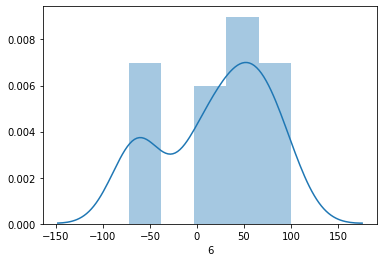

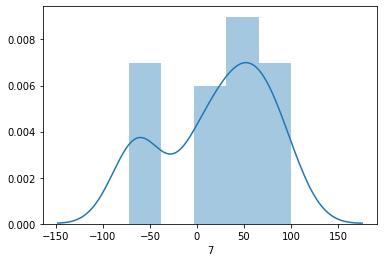

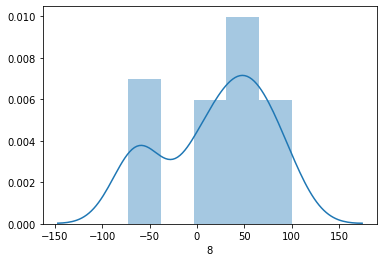

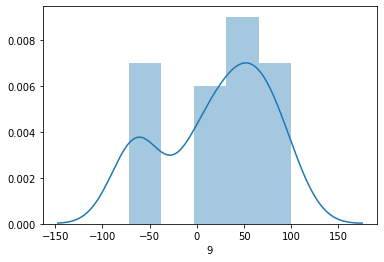

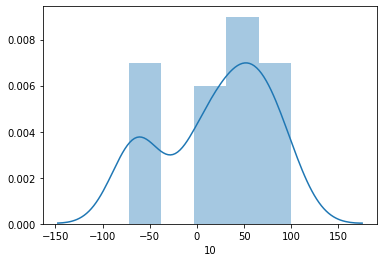

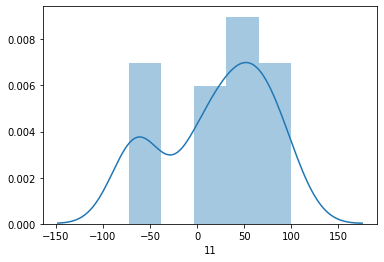

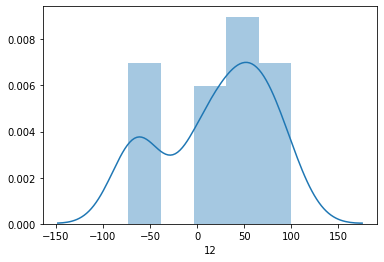

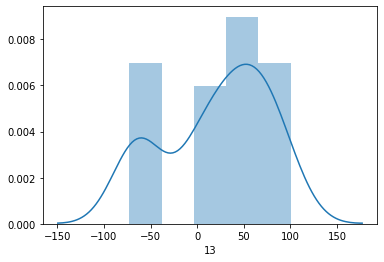

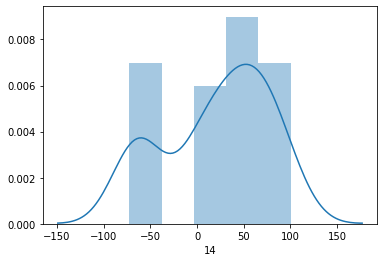

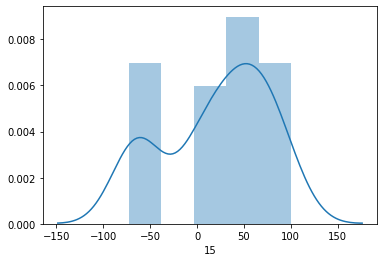

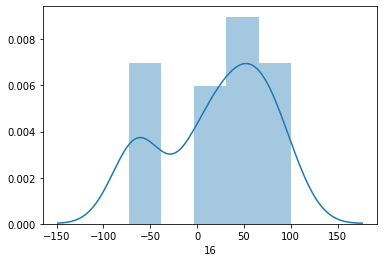

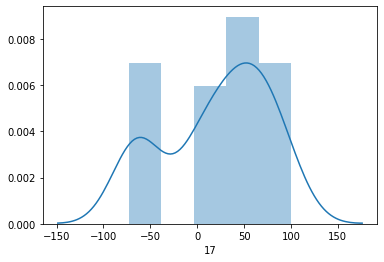

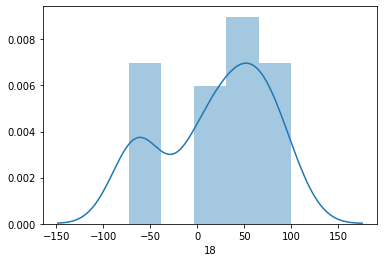

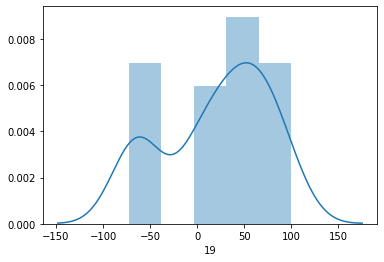

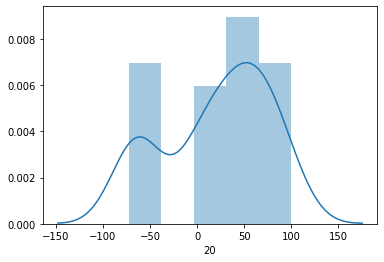

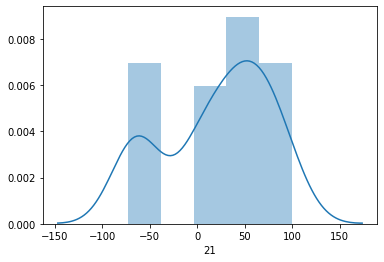

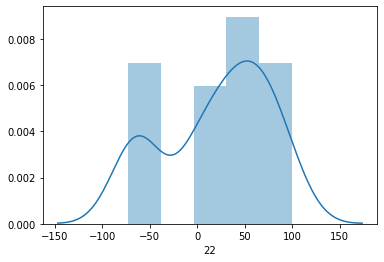

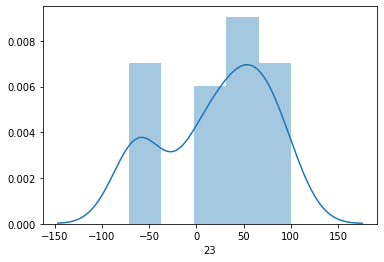

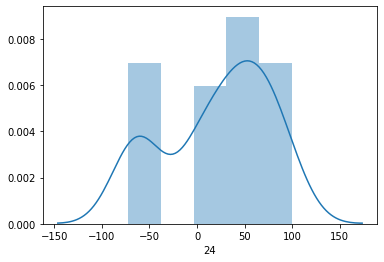

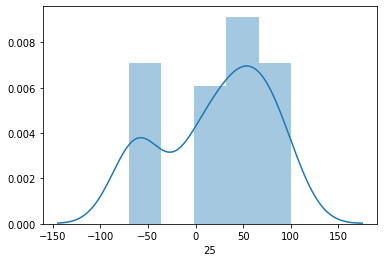

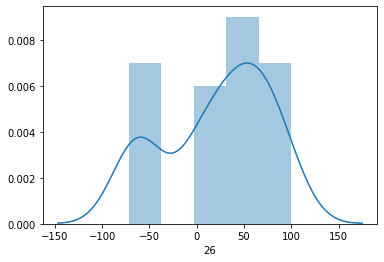

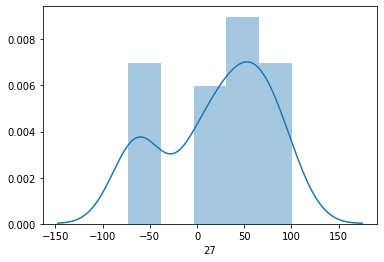

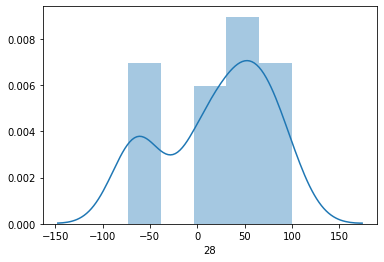

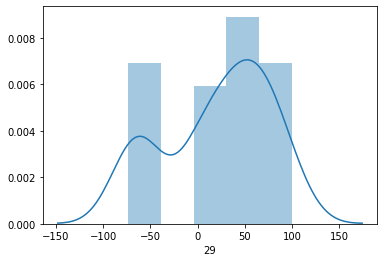

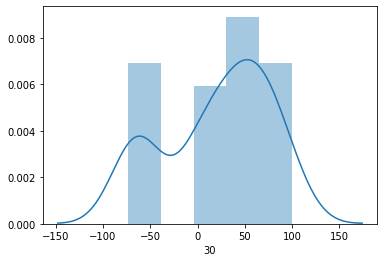

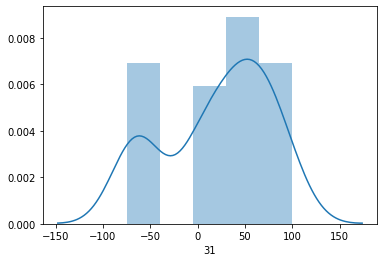

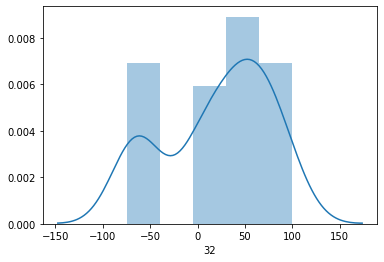

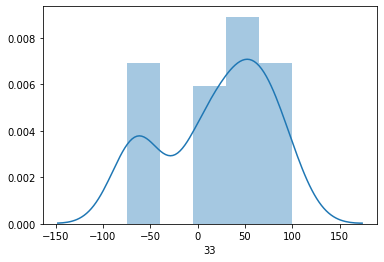

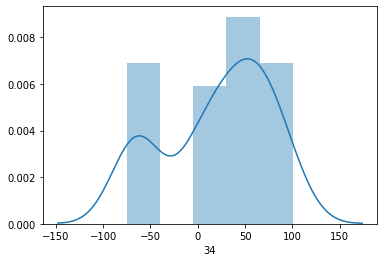

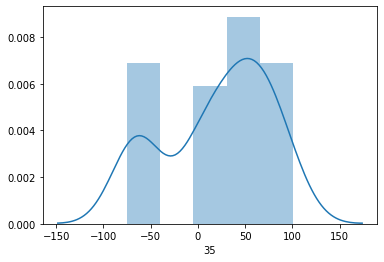

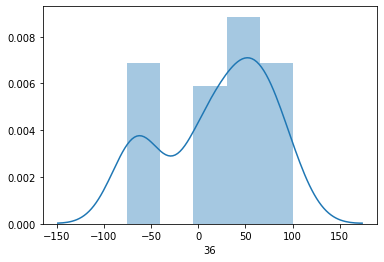

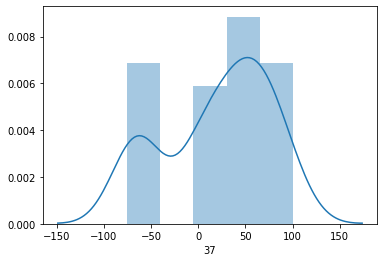

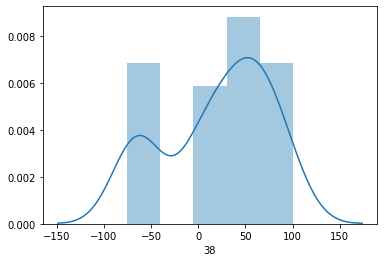

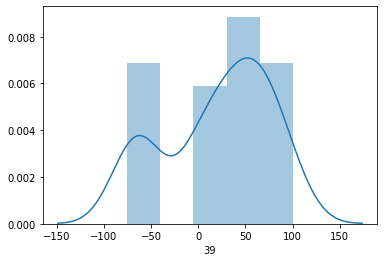

In [177]:
for i in range(2,39):
    sns.distplot(df1.iloc[i])
    plt.show()

#### TRAIN TEST SPLIT :

In [171]:
X=df.drop('Class',axis=1)
y=df['Class']

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 44)

In [174]:
X_train.shape

(54667, 37)

In [175]:
y_train.shape

(54667,)

In [176]:
X_test.shape

(23429, 37)

In [177]:
y_test.shape

(23429,)

#### APPLYING BASE MODEL [ KNN] :

In [178]:
from sklearn.neighbors import KNeighborsClassifier

In [179]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [180]:
accuracy = knn.score(X_test, y_test) 
print(accuracy)

0.9421656920909983


In [188]:
y_pred=knn.predict(X_test)

In [183]:
from sklearn.metrics import confusion_matrix,classification_report


In [190]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.96      1.00      0.98      4850
         2.0       0.91      0.96      0.94      4522
         3.0       0.95      0.93      0.94      4910
         4.0       0.92      0.94      0.93      4354
         5.0       0.98      0.88      0.92      4792

    accuracy                           0.94     23429
   macro avg       0.79      0.79      0.78     23429
weighted avg       0.94      0.94      0.94     23429



### DECISION TREE :


In [194]:
from sklearn.tree import DecisionTreeClassifier 

In [195]:
d_tree=DecisionTreeClassifier()

In [196]:
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [197]:
d_tree.score(X_test,y_test)

0.9704639549276538

In [198]:
y_pred=d_tree.predict(X_test)

In [199]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.99      0.99      0.99      4850
         2.0       0.96      0.96      0.96      4522
         3.0       0.97      0.98      0.97      4910
         4.0       0.97      0.96      0.97      4354
         5.0       0.96      0.96      0.96      4792

    accuracy                           0.97     23429
   macro avg       0.81      0.81      0.81     23429
weighted avg       0.97      0.97      0.97     23429



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### NAVIVE BAYES CLASSIFIER :

In [200]:
from sklearn.naive_bayes import GaussianNB 

In [201]:
gnb=GaussianNB()

In [202]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [203]:
gnb.score(X_test,y_test)

0.3728712279653421

In [207]:
y_pred=gnb.predict(X_test)

In [208]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.00      0.00      0.00      4850
         2.0       1.00      0.00      0.00      4522
         3.0       0.35      1.00      0.51      4910
         4.0       0.34      0.15      0.21      4354
         5.0       0.44      0.66      0.52      4792

    accuracy                           0.37     23429
   macro avg       0.35      0.30      0.21     23429
weighted avg       0.42      0.37      0.26     23429



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### SVM: